In [1]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 19.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/rishiraj-cs/Datasets/master/Weather_Ranchi%20-%20Sheet1.csv")

In [5]:
df.fillna(method='ffill', inplace = True)

In [6]:
df.loc[(df['MIN_TEMP'] == 'na'), 'MIN_TEMP'] = 30
df.loc[(df['MIN_TEMP'] == '///'), 'MIN_TEMP'] = 25

In [7]:
df

,DATE,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS
0,1/1/1969,23.3,8.4,0.0
1,1/2/1969,24.9,11.9,0.0
2,1/3/1969,24.1,12.4,0.0
3,1/4/1969,23.4,9.9,0.0
4,1/5/1969,23.6,10,0.0
...,...,...,...,...
18774,5/27/2020,39.8,28.5,0.0
18775,5/28/2020,33.8,22.6,1.0
18776,5/29/2020,34.4,21,1.6
18777,5/30/2020,35.9,23,0.6


In [8]:
df['MIN_TEMP'] = df['MIN_TEMP'].astype('float64')

In [9]:
df.dtypes

DATE                object
MAX_TEMP           float64
MIN_TEMP           float64
RAINFALL_24_HRS    float64
dtype: object

#Q1a

Text(0, 0.5, 'MAX_TEMP')

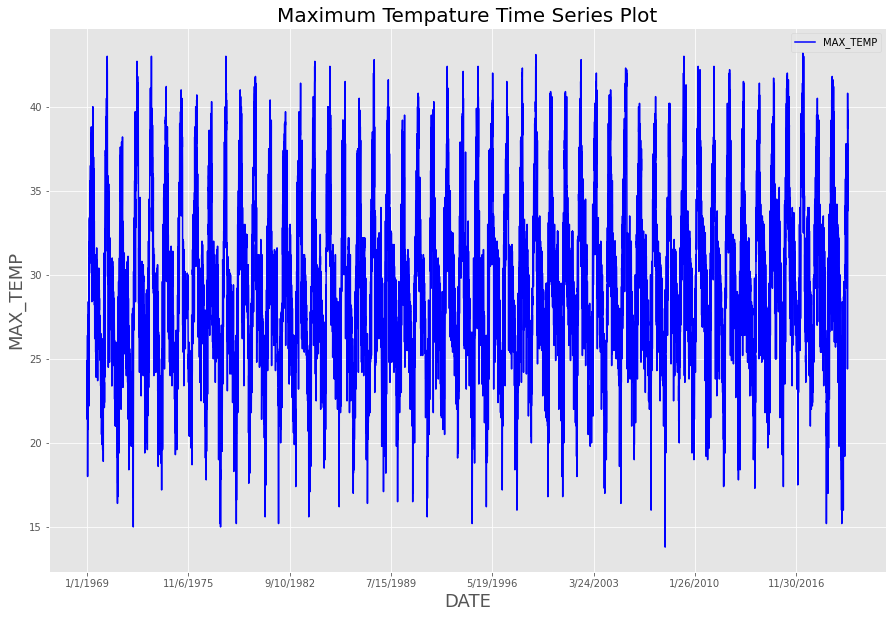

In [10]:
axl = df.plot(kind='line', x='DATE', y='MAX_TEMP', color='blue', figsize=(15, 10))
plt.title('Maximum Tempature Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('MAX_TEMP', size=18)

Text(0, 0.5, 'MAX_TEMP_MEAN')

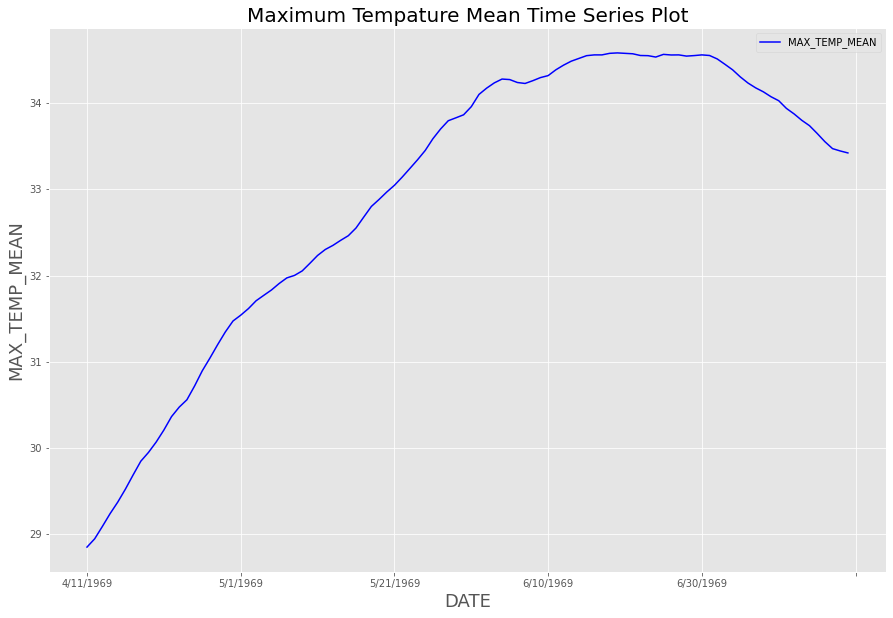

In [11]:
df['MAX_TEMP_MEAN'] = df['MAX_TEMP'].rolling(100).mean()
axl = df[100:200].plot(kind='line', x='DATE', y='MAX_TEMP_MEAN', color='blue', figsize=(15, 10))
plt.title('Maximum Tempature Mean Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('MAX_TEMP_MEAN', size=18)

In [12]:
adfuller(df['MAX_TEMP'].values, autolag='AIC')

(-13.040245346264403,
 2.2489801266997305e-24,
 45,
 18733,
 {'1%': -3.430699127010736,
  '10%': -2.5668521304622476,
  '5%': -2.861694301293565},
 74396.12819746428)

#Q1b

Text(0, 0.5, 'MIN_TEMP')

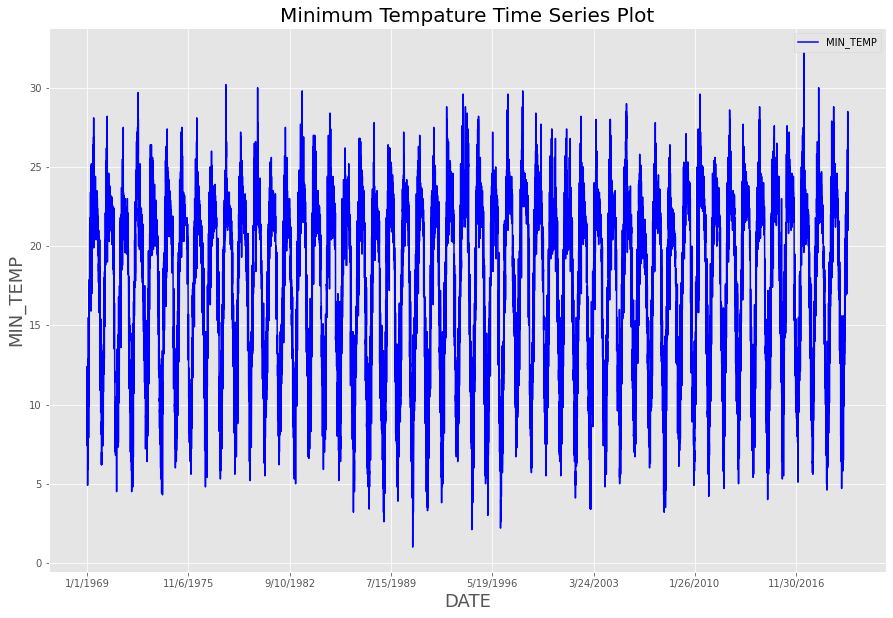

In [13]:
axl = df.plot(kind='line', x='DATE', y='MIN_TEMP', color='blue', figsize=(15, 10))
plt.title('Minimum Tempature Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('MIN_TEMP', size=18)

Text(0, 0.5, 'MIN_TEMP_MEAN')

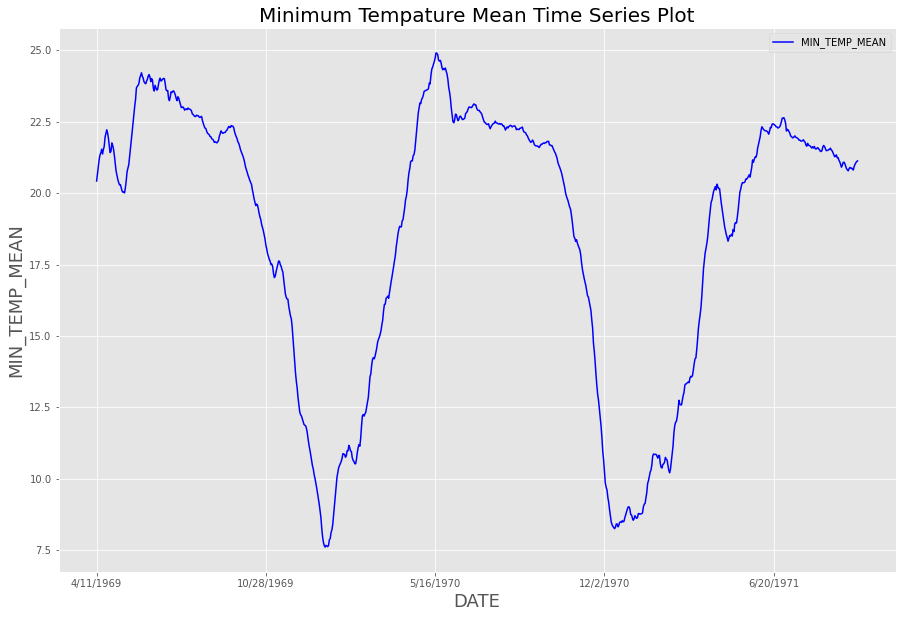

In [16]:
df['MIN_TEMP_MEAN'] = df['MIN_TEMP'].rolling(20).mean()
axl = df[100:1000].plot(kind='line', x='DATE', y='MIN_TEMP_MEAN', color='blue', figsize=(15, 10))
plt.title('Minimum Tempature Mean Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('MIN_TEMP_MEAN', size=18)

In [15]:
adfuller(df['MIN_TEMP'].values, autolag='AIC')

(-13.849869949459606,
 7.037344043245695e-26,
 45,
 18733,
 {'1%': -3.430699127010736,
  '10%': -2.5668521304622476,
  '5%': -2.861694301293565},
 68686.58185541778)

#Q1c

Text(0, 0.5, 'RAINFALL_24_HRS')

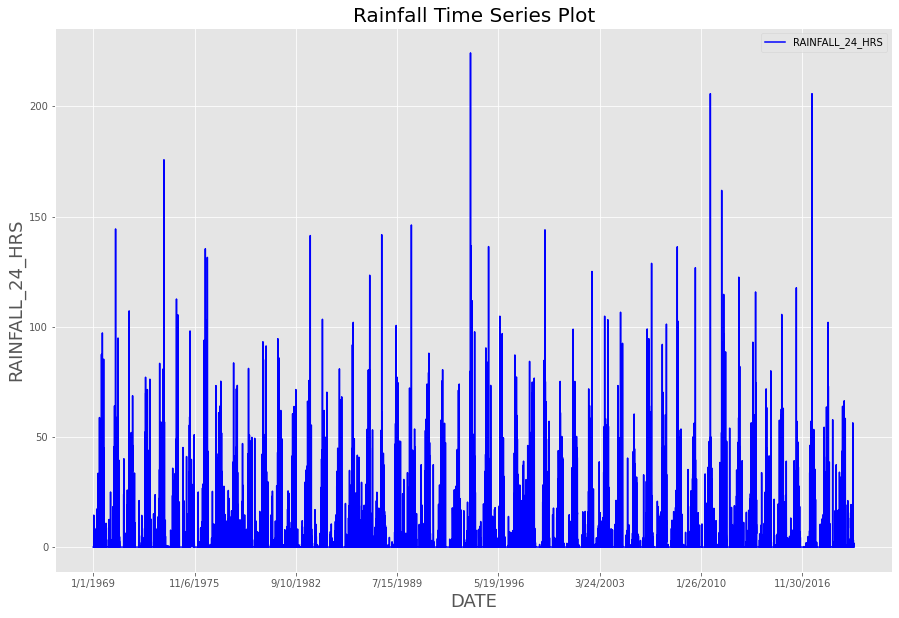

In [17]:
axl = df.plot(kind='line', x='DATE', y='RAINFALL_24_HRS', color='blue', figsize=(15, 10))
plt.title('Rainfall Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('RAINFALL_24_HRS', size=18)

Text(0, 0.5, 'RAINFALL_24_HRS_MEAN')

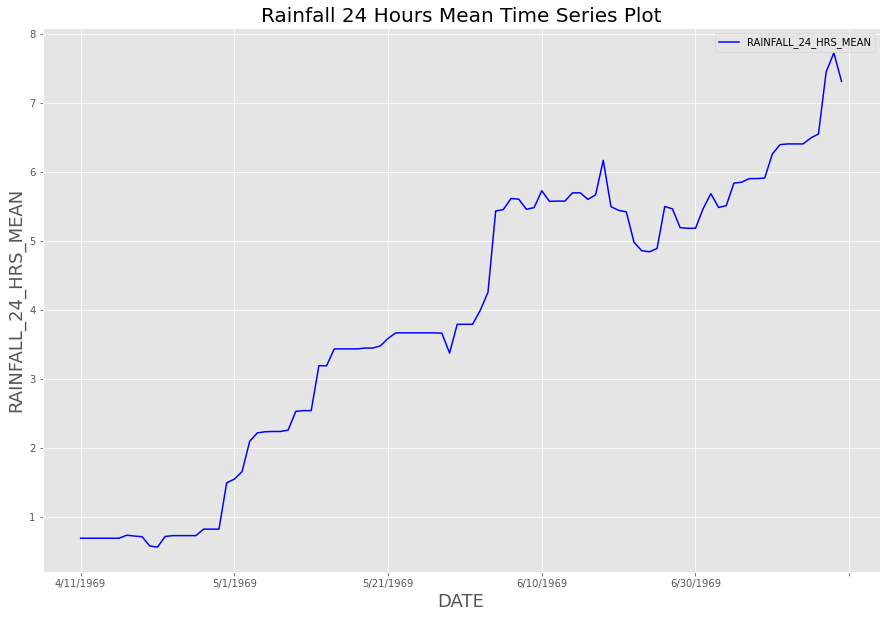

In [18]:
df['RAINFALL_24_HRS_MEAN'] = df['RAINFALL_24_HRS'].rolling(50).mean()
axl = df[100:200].plot(kind='line', x='DATE', y='RAINFALL_24_HRS_MEAN', color='blue', figsize=(15, 10))
plt.title('Rainfall 24 Hours Mean Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('RAINFALL_24_HRS_MEAN', size=18)

In [17]:
adfuller(df['RAINFALL_24_HRS'].values, autolag='AIC')

(-12.162529796846355,
 1.4823700586350692e-22,
 40,
 18738,
 {'1%': -3.4306990338378105,
  '10%': -2.56685210854463,
  '5%': -2.861694260116981},
 143566.6379805431)

#**Conclusion** - Maximum Temperature, Minimum Temperature and Rainfall-24-Hours are Non-Stationary Time Series Data. It has seasonal component

#Q1d

In [19]:
from statsmodels.tsa.ar_model import AutoReg

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
df = df[['DATE', 'MAX_TEMP']]

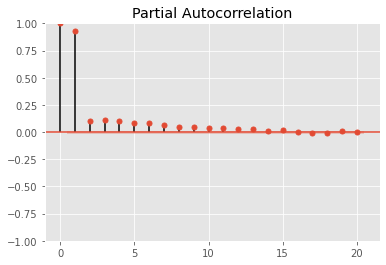

In [22]:
pacf = plot_pacf(df['MAX_TEMP'], lags = 20, method='ywm')

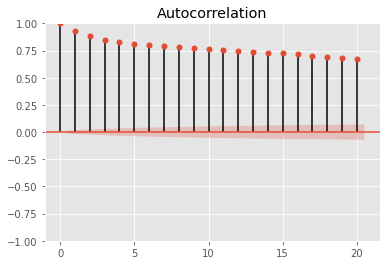

In [23]:
acf = plot_acf(df['MAX_TEMP'], lags = 20)

In [24]:
len(df)

18779

In [25]:
df.set_index('DATE', inplace = True)

In [26]:
df

,MAX_TEMP
DATE,
1/1/1969,23.3
1/2/1969,24.9
1/3/1969,24.1
1/4/1969,23.4
1/5/1969,23.6
...,...
5/27/2020,39.8
5/28/2020,33.8
5/29/2020,34.4


In [44]:
train = df[0:18000]
test = df[18000:]

#AR

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
model = AutoReg(train, lags = 2).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:               MAX_TEMP   No. Observations:                18000
Model:                     AutoReg(2)   Log Likelihood              -36009.326
Method:               Conditional MLE   S.D. of innovations              1.789
Date:                Thu, 04 Nov 2021   AIC                          72026.652
Time:                        18:10:09   BIC                          72057.844
Sample:                    01-03-1969   HQIC                         72036.910
                         - 04-13-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7644      0.081     21.773      0.000       1.606       1.923
MAX_TEMP.L1     0.8334      0.007    112.437      0.000       0.819       0.848
MAX_TEMP.L2     0.1067      0.007     14.393    

In [38]:
predict = model.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 5.254771144646247, R2_Score = 0.029004843695382695


In [39]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:               MAX_TEMP   No. Observations:                18000
Model:                     AutoReg(3)   Log Likelihood              -35899.311
Method:               Conditional MLE   S.D. of innovations              1.779
Date:                Thu, 04 Nov 2021   AIC                          71808.621
Time:                        09:51:12   BIC                          71847.611
Sample:                    01-04-1969   HQIC                         71821.443
                         - 04-13-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5719      0.082     19.261      0.000       1.412       1.732
MAX_TEMP.L1     0.8218      0.007    110.901      0.000       0.807       0.836
MAX_TEMP.L2     0.0154      0.010      1.603    

In [40]:
predict = model.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 5.225582794612464, R2_Score = 0.03976193726166277


In [31]:
model = AutoReg(train, lags = 10).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:               MAX_TEMP   No. Observations:                18000
Model:                    AutoReg(10)   Log Likelihood              -35580.390
Method:               Conditional MLE   S.D. of innovations              1.749
Date:                Thu, 04 Nov 2021   AIC                          71184.780
Time:                        18:10:16   BIC                          71278.351
Sample:                    01-11-1969   HQIC                         71215.551
                         - 04-13-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9823      0.084     11.711      0.000       0.818       1.147
MAX_TEMP.L1      0.7833      0.007    105.106      0.000       0.769       0.798
MAX_TEMP.L2      0.0046      0.009      0.48

In [32]:
predict = model.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 5.1253129318573984, R2_Score = 0.07625899080848586


#MA

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               MAX_TEMP   No. Observations:                18000
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -46514.644
Date:                Thu, 04 Nov 2021   AIC                          93035.288
Time:                        18:10:36   BIC                          93058.683
Sample:                    01-01-1969   HQIC                         93042.982
                         - 04-13-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4531      0.043    691.610      0.000      29.370      29.537
ma.L1          0.7661      0.004    170.562      0.000       0.757       0.775
sigma2        10.2817      0.108     94.941      0.0

In [34]:
predict = model_fit.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 5.39151887538239, R2_Score = -0.022190194528997953


In [35]:
model = ARIMA(train, order=(0,0,2))
model_fit = model.fit()
print(model_fit.summary())
predict = model_fit.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

                               SARIMAX Results                                
Dep. Variable:               MAX_TEMP   No. Observations:                18000
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -42483.885
Date:                Thu, 04 Nov 2021   AIC                          84975.771
Time:                        18:10:46   BIC                          85006.963
Sample:                    01-01-1969   HQIC                         84986.028
                         - 04-13-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4530      0.049    600.627      0.000      29.357      29.549
ma.L1          1.0013      0.005    184.242      0.000       0.991       1.012
ma.L2          0.5649      0.006     98.478      0.0

In [36]:
model = ARIMA(train, order=(0,0,3))
model_fit = model.fit()
print(model_fit.summary())
predict = model_fit.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

                               SARIMAX Results                                
Dep. Variable:               MAX_TEMP   No. Observations:                18000
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -40529.419
Date:                Thu, 04 Nov 2021   AIC                          81068.838
Time:                        18:10:58   BIC                          81107.829
Sample:                    01-01-1969   HQIC                         81081.660
                         - 04-13-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4530      0.056    526.728      0.000      29.343      29.563
ma.L1          1.0371      0.006    176.029      0.000       1.026       1.049
ma.L2          0.8105      0.008    104.580      0.0

#SARIMA

In [67]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 32.6 MB/s 


In [68]:
import pmdarima as pm

In [69]:
train_df = df[:18000]
test_df = df[18000:]

In [ ]:
Arima_model=pm.auto_arima(train_df, p=2, q=0, start_P=0, start_Q=0, max_P=10, max_Q=10, m=365, stepwise=True, seasonal=True, information_criterion='aic', trace=True, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[365] intercept   : AIC=71302.826, Time=11.87 sec
 ARIMA(0,1,0)(0,0,0)[365] intercept   : AIC=72845.872, Time=0.54 sec


In [ ]:
print(Arima_model.summary())

In [ ]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=773), index=test_df)
prediction=np.array(prediction)
prediction=prediction.reshape(773,-1)
plt.plot(test_df)
plt.plot(prediction)
plt.xlabel('Days')
plt.ylabel('Maximum Temperature')
plt.legend(["Actual Values", "Predicted Values"], loc ="lower right") 
plt.title("Actual Values vs. Predicted Values")
plt.show()

#SARIMA

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model = SARIMAX(train, order = (2,0,0))
model_fit = model.fit()
print(model_fit.summary())
predict = model_fit.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

                               SARIMAX Results                                
Dep. Variable:               MAX_TEMP   No. Observations:                18000
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -36249.838
Date:                Thu, 04 Nov 2021   AIC                          72505.675
Time:                        10:16:28   BIC                          72529.070
Sample:                    01-01-1969   HQIC                         72513.369
                         - 04-13-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8626      0.005    160.271      0.000       0.852       0.873
ar.L2          0.1358      0.005     25.646      0.000       0.125       0.146
sigma2         3.2857      0.023    145.669      0.0

In [58]:
train = train[-3000:]

In [ ]:
model = SARIMAX(train, order = (2,0,0), seasonal_order=(1,0,0,365))
model_fit = model.fit()
print(model_fit.summary())

In [55]:
predict = model_fit.predict(start = len(train), end = len(df)-1, dynamic = False)
rmse = sqrt(mean_squared_error(test, predict))
r2 = r2_score(test, predict, multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 12.344841249765517, R2_Score = -4.358959433493426


#LSTM

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [45]:
train = df['MAX_TEMP'][0:18000]
test = df['MAX_TEMP'][18000:]

In [46]:
train_size = len(train)
test_size = len(test)

In [47]:
train = np.expand_dims(train,axis=1)
test = np.expand_dims(test,axis=1)

In [48]:
train

array([[23.3],
       [24.9],
       [24.1],
       ...,
       [34.8],
       [31.2],
       [35.2]])

In [49]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [51]:
test = scaler.fit_transform(test)

In [52]:
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [53]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(17994, 5) (17994,) (773, 5) (773,)


In [54]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(17994, 1, 5) (17994,) (773, 1, 5) (773,)


In [56]:
import keras

In [57]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, lookback)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
2025/2025 - 5s - loss: 0.0062 - val_loss: 0.0043
Epoch 2/100
2025/2025 - 3s - loss: 0.0038 - val_loss: 0.0038
Epoch 3/100
2025/2025 - 3s - loss: 0.0037 - val_loss: 0.0039
Epoch 4/100
2025/2025 - 3s - loss: 0.0037 - val_loss: 0.0038
Epoch 5/100
2025/2025 - 3s - loss: 0.0037 - val_loss: 0.0039
Epoch 6/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0039
Epoch 7/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0038
Epoch 8/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0038
Epoch 9/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0039
Epoch 10/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0039
Epoch 11/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0038
Epoch 12/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0038
Epoch 13/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0038
Epoch 14/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0038
Epoch 15/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0039
Epoch 16/100
2025/2025 - 3s - loss: 0.0036 - val_loss: 0.0038
Epoch 17/100
2025

dict_keys(['loss', 'val_loss'])


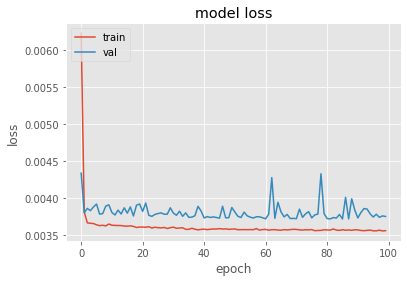

In [58]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)
Y_test = scaler.inverse_transform([Y_test])

In [60]:
test_prediction.shape

(773, 1)

In [61]:
Y_test.shape

(1, 773)

In [62]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

No handles with labels found to put in legend.


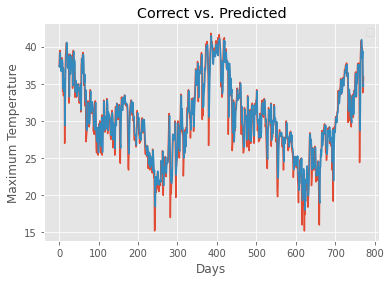

In [64]:
plt.plot(Y_test)
plt.plot(test_prediction)
plt.xlabel('Days')
plt.ylabel('Maximum Temperature')
plt.title("Correct vs. Predicted")
plt.legend()
plt.show()

In [66]:
import math
mse = mean_squared_error(Y_test, test_prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2.139546


#**Conclusion** LSTM model have lowest MSE hence they best fit the temperature data